# Experiment 10
**Aim**: WAP to implement a Decision Tree.

# Decision Tree

Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter / differentiator in input variables.

# Decision Tree - Algorithm

1. Place the best attribute of the dataset at the root of the tree.
2. Split the training set into subsets. Subsets should be made in such a way that each subset contains data with the same value for an attribute.
3. Repeat step 1 and step 2 on each subset until you find leaf nodes in all the branches of the tree.

In [11]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

In [3]:
# Create synthetic data for classification
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create and train the Decision Tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
# Make predictions on the test data
y_pred = tree_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.82


In [7]:
# Create a mesh grid for visualization
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [8]:
# Predict the class for each point in the mesh grid
Z = tree_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

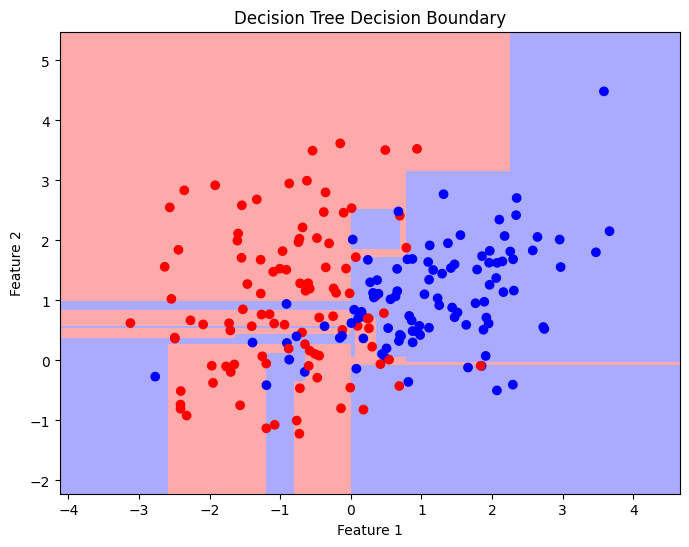

In [9]:
# Plot the decision boundary and data points
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Tree Decision Boundary')
plt.show()

In [12]:
# Print the confusion matrix
print("Confusion Matrix:")

cm = confusion_matrix(y_test, y_pred)

import pandas as pd
cm_df = pd.DataFrame(cm,
                     index = ['Actual 0', 'Actual 1'], 
                     columns = ['Predicted 0', 'Predicted 1'])

print(cm_df)

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           18            5
Actual 1            2           15
